## <div align="center"> UJIAN AKHIR SEMESTER IF540-L MACHINE LEARNING </div>
## <div align="center"> Semester Gasal 2024/2025 </div>
## <div align="center"> [Implementasi Algoritma C4.5 untuk Klasifikasi Obat Berdasarkan Karakteristik Pasien] </div>

---
## Instruction

<ul>
    <li>Please make sure that <b>ALL</b> required submission files are submitted on the E-Learning.</li>
    <li>Please make sure to use <b>Markdown</b> as comment for the code you are writing</li>
    <li>Do not ZIP the submission files</li>
</ul>

## Caution
<ul>
    <li>We DOES NOT ACCEPT a submission via Gmail, Google Drive, Whatsapp, or any other than E-Learning</li>
    <li>We DOES NOT tolerate any plagriarism, etc.</li>
    <li>DO NOT change the order of this template.</li>
</ul>

---
### Group - 4

##### Members :
<ul>
    <li>1. Pandu Aji Wicaksono (00000078666)</li>
    <li>2. Rizky Ali Zamzami (00000079009)</li>
    <li>3. Abi Andrea Nurpasha (00000079207)</li>
    <li>4. Fikri Naufal Andrasito (00000079229)</li>
</ul>

---



### The dataset that are being used for the project

1. [Drug] - sumber : [https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees]

### Dataset Description:
##### Please describe the dataset with much detail if possible
Dataset ini berisi informasi tentang sekelompok pasien yang menderita penyakit yang sama. Setiap pasien dalam dataset ini telah menerima salah satu dari lima jenis obat selama proses pengobatan, yaitu Obat A, Obat B, Obat C, Obat X, dan Obat Y.
Fitur-fitur yang terdapat dalam dataset ini meliputi:

Usia: Umur pasien yang dapat mempengaruhi respons terhadap pengobatan.
Jenis Kelamin: Jenis kelamin pasien, yang mungkin berperan dalam efektivitas obat.
Tekanan Darah: Tingkat tekanan darah pasien, yang dapat menjadi faktor penting dalam menentukan pengobatan yang tepat.
Kadar Kolesterol: Tingkat kolesterol pasien, yang juga dapat mempengaruhi pilihan obat.
Target dari dataset ini adalah jenis obat yang diberikan kepada setiap pasien berdasarkan respons mereka terhadap pengobatan. Dataset ini digunakan sebagai contoh untuk membangun model klasifikasi multikelas, di mana model tersebut dapat dilatih menggunakan bagian data pelatihan untuk membangun pohon keputusan. Model ini kemudian dapat digunakan untuk memprediksi jenis obat yang mungkin cocok untuk pasien baru yang mengalami penyakit yang sama.

### Project Showcase

In [ ]:
# importing data
!pip install gdown
import gdown

# File ID dari link yang kamu berikan
file_id = '1WcOGCIHkct6vfLFFroOrCcDrGf3PXSSV'
# Buat URL untuk diunduh
download_url = f'https://drive.google.com/uc?id={file_id}'
# Nama file yang akan disimpan
output = 'DrugData.csv'  # Ganti dengan ekstensi file yang benar

# Download file
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1WcOGCIHkct6vfLFFroOrCcDrGf3PXSSV
To: /content/DrugData.csv
100%|██████████| 5.83k/5.83k [00:00<00:00, 907kB/s]


'DrugData.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DrugData.csv')
print(df.shape)
print(df.info())

(200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [ ]:
#Melihat nilai unik
columns = ['Sex', 'BP', 'Cholesterol', 'Drug']  # Kolom yang ingin dilihat
for column in columns:
    print(f"Nilai unik untuk kolom {column}: {df[column].unique()}")

Nilai unik untuk kolom Sex: ['F' 'M']
Nilai unik untuk kolom BP: ['HIGH' 'LOW' 'NORMAL']
Nilai unik untuk kolom Cholesterol: ['HIGH' 'NORMAL']
Nilai unik untuk kolom Drug: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
print(df.head(20))

    Age Sex      BP Cholesterol  Na_to_K   Drug
0    23   F    HIGH        HIGH   25.355  drugY
1    47   M     LOW        HIGH   13.093  drugC
2    47   M     LOW        HIGH   10.114  drugC
3    28   F  NORMAL        HIGH    7.798  drugX
4    61   F     LOW        HIGH   18.043  drugY
5    22   F  NORMAL        HIGH    8.607  drugX
6    49   F  NORMAL        HIGH   16.275  drugY
7    41   M     LOW        HIGH   11.037  drugC
8    60   M  NORMAL        HIGH   15.171  drugY
9    43   M     LOW      NORMAL   19.368  drugY
10   47   F     LOW        HIGH   11.767  drugC
11   34   F    HIGH      NORMAL   19.199  drugY
12   43   M     LOW        HIGH   15.376  drugY
13   74   F     LOW        HIGH   20.942  drugY
14   50   F  NORMAL        HIGH   12.703  drugX
15   16   F    HIGH      NORMAL   15.516  drugY
16   69   M     LOW      NORMAL   11.455  drugX
17   43   M    HIGH        HIGH   13.972  drugA
18   23   M     LOW        HIGH    7.298  drugC
19   32   F    HIGH      NORMAL   25.974

In [ ]:
# Memberikan informasi tentang dataset untuk features dan target
print("Feature names: \n{}" . format(df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]))
print("Target name: \n{}" . format(df['Drug']))

Feature names: 
     Age Sex      BP Cholesterol  Na_to_K
0     23   F    HIGH        HIGH   25.355
1     47   M     LOW        HIGH   13.093
2     47   M     LOW        HIGH   10.114
3     28   F  NORMAL        HIGH    7.798
4     61   F     LOW        HIGH   18.043
..   ...  ..     ...         ...      ...
195   56   F     LOW        HIGH   11.567
196   16   M     LOW        HIGH   12.006
197   52   M  NORMAL        HIGH    9.894
198   23   M  NORMAL      NORMAL   14.020
199   40   F     LOW      NORMAL   11.349

[200 rows x 5 columns]
Target name: 
0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


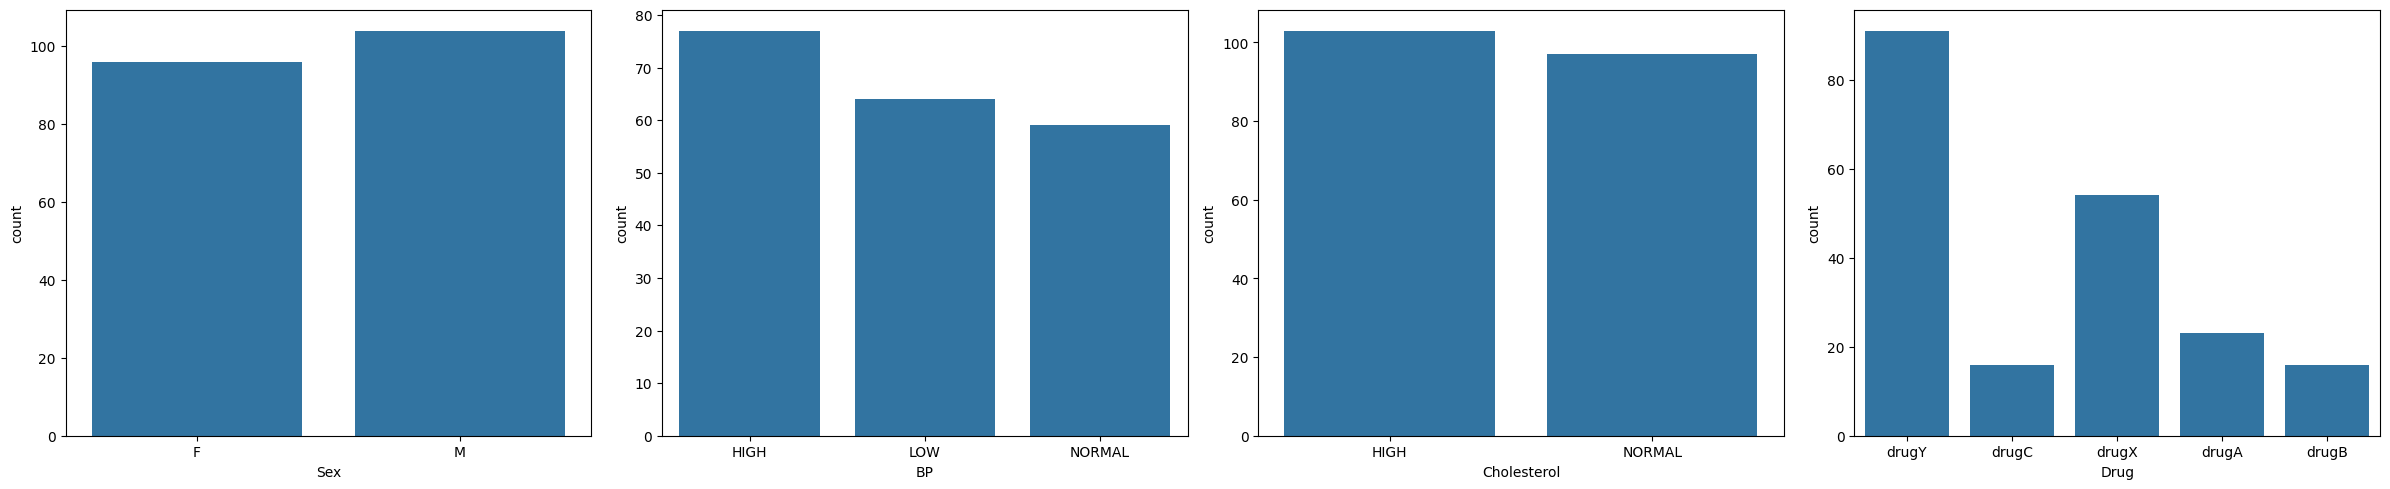

In [ ]:
# Distribusi variabel kategori
fig, ax = plt.subplots(1, 4, figsize=(24, 5))  # Menyusun Layout menyamping untuk 4 plot
sns.countplot(x='Sex', data=df, ax=ax[0])
sns.countplot(x='BP', data=df, ax=ax[1])
sns.countplot(x='Cholesterol', data=df, ax=ax[2])
sns.countplot(x='Drug', data=df, ax=ax[3])  # Menambahkan variabel Drug

plt.tight_layout()  # Mengatur layout agar tidak overlap
plt.show()


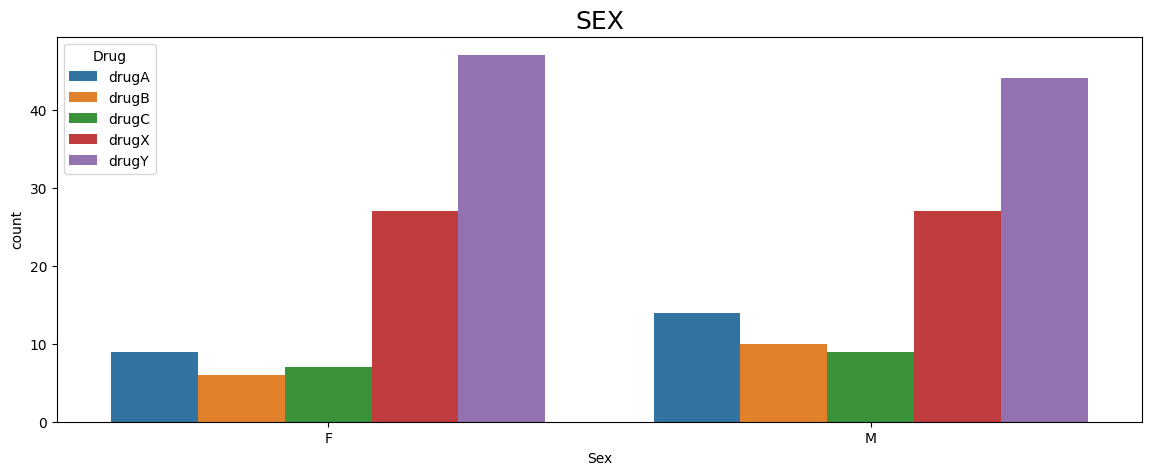

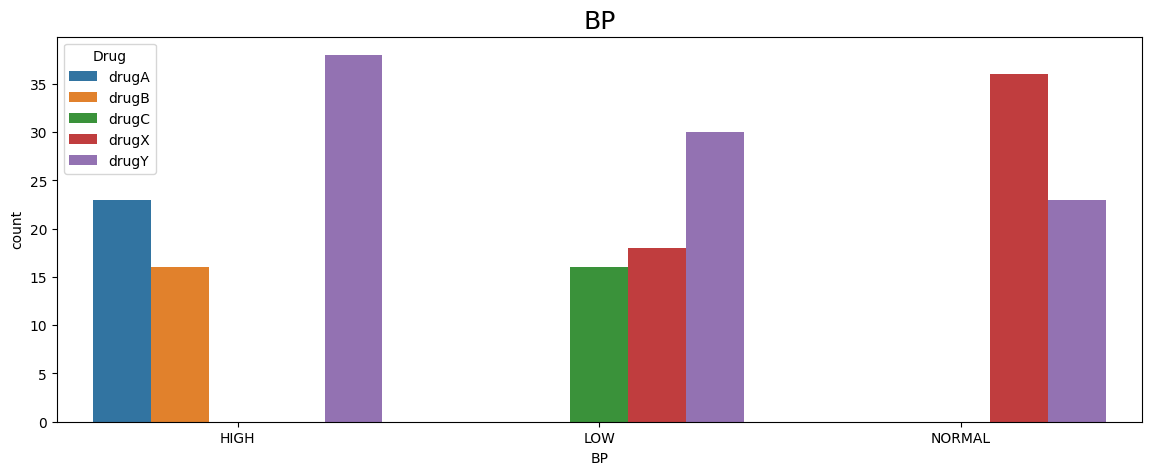

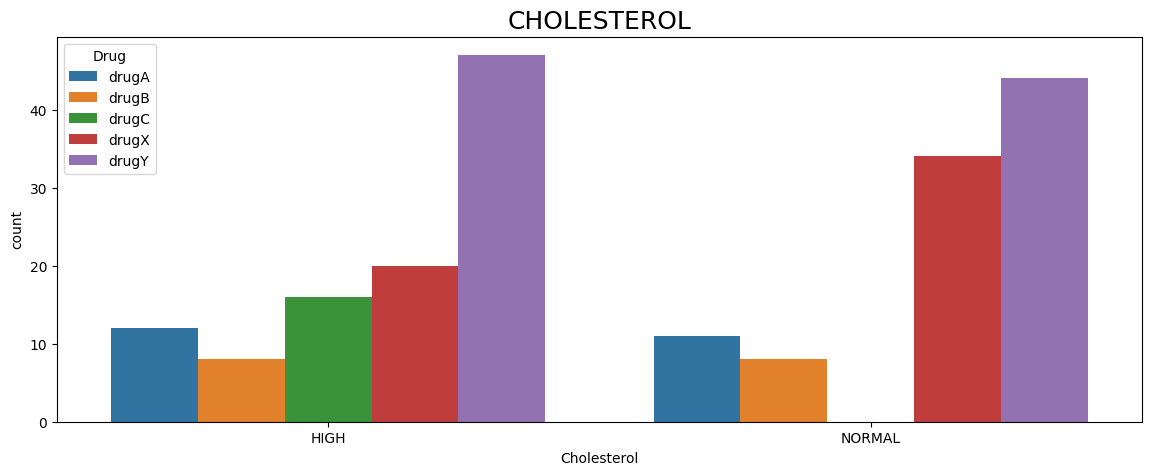

In [ ]:
# Distribusi feature terhadap target
# Kolom kategorikal
categoric_columns = ['Sex', 'BP', 'Cholesterol']

# Memplot setiap kolom kategorikal
for i in categoric_columns:
    plt.figure(figsize=(14,5))
    # Asumsi kolom 'Drug' adalah target dan sudah ada di df
    sns.countplot(x=i, data=df, hue='Drug', hue_order=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
    plt.title(i.upper(), fontsize=18)
    plt.show()


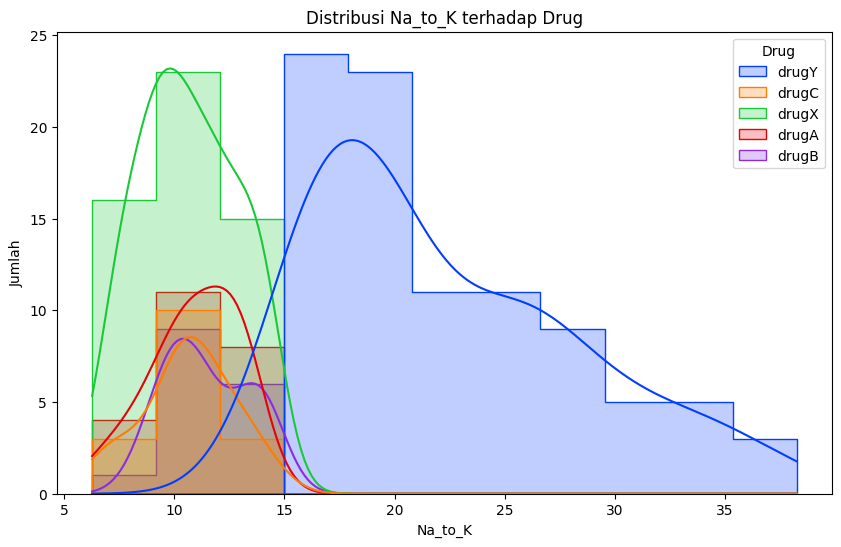

In [ ]:
#Menvisualisasi Distribusi Variabel Na_to_K berhubungan dengan Drug
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Na_to_K', hue='Drug', element='step', kde=True, palette='bright')
plt.title('Distribusi Na_to_K terhadap Drug')
plt.xlabel('Na_to_K')
plt.ylabel('Jumlah')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

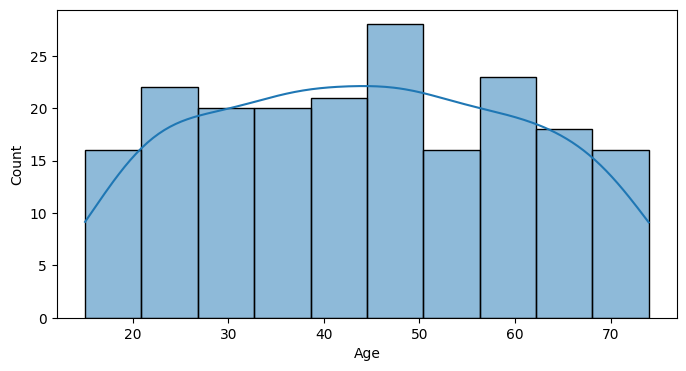

In [ ]:
# Distribusi usia
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=10)

<Axes: xlabel='Na_to_K', ylabel='Count'>

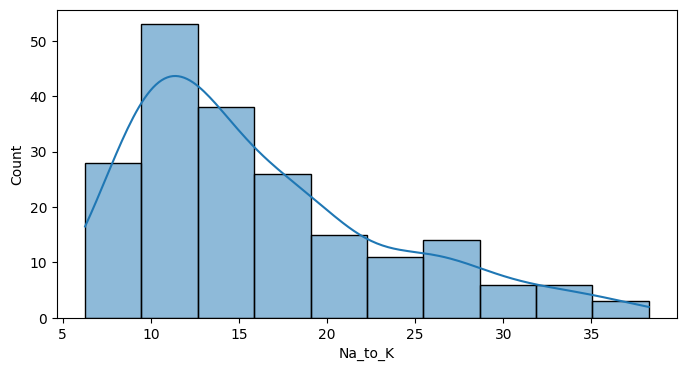

In [ ]:
# Distribusi Na_to_K
plt.figure(figsize=(8, 4))
sns.histplot(df['Na_to_K'], kde=True, bins=10)
# positive skewed

In [ ]:
print(df.describe())  # Deskripsi statistik dasar

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


<Axes: ylabel='Age'>

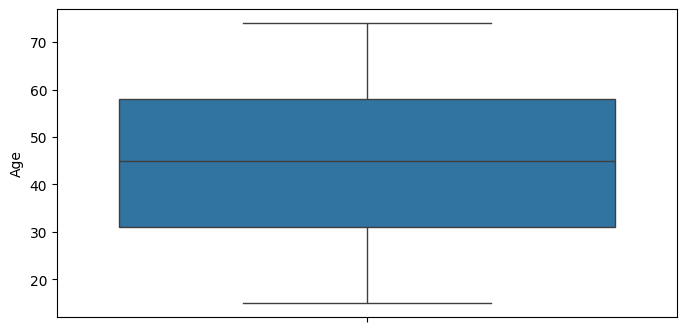

In [ ]:
# Boxplot untuk age
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Age'])

<Axes: ylabel='Na_to_K'>

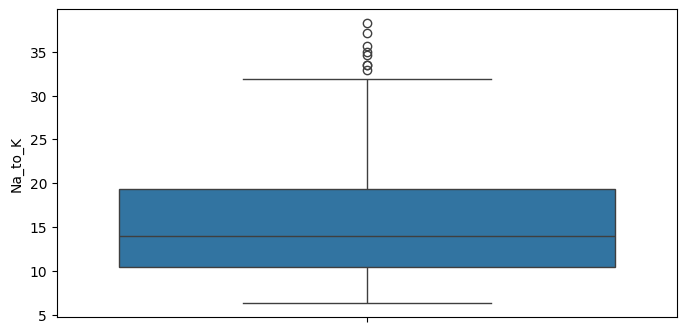

In [ ]:
# Boxplot untuk Na_to_K
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Na_to_K'])

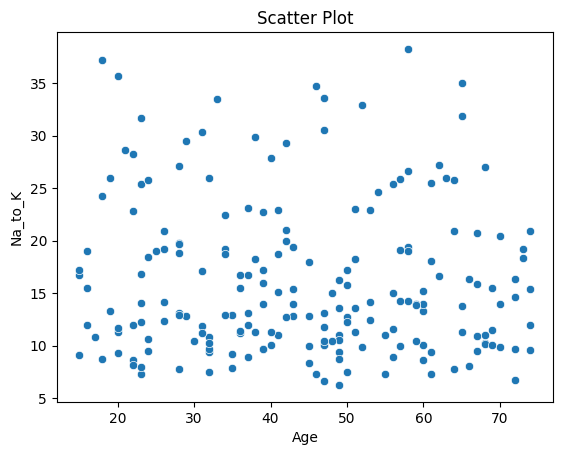

In [ ]:
# Membuat scatter plot menggunakan seaborn
sns.scatterplot(x='Age', y='Na_to_K', data=df)

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Na_to_K')

# Menampilkan plot
plt.show()


### Rekayasa Fitur

In [ ]:
#Merekayasa fitur Na_to_K agar terdistribusi normal memakai boxcox
import pandas as pd
import numpy as np
from scipy.stats import boxcox, skew, kurtosis, shapiro

# Transformasi data
df['Na_to_K_log'] = np.log(df['Na_to_K'] + 1)  # Log transformasi
df['Na_to_K_sqrt'] = np.sqrt(df['Na_to_K'])    # Square root transformasi
df['Na_to_K_boxcox'], fitted_lambda = boxcox(df['Na_to_K'] + 1)  # Box-Cox transformasi

# Fungsi untuk uji skewness, kurtosis, dan normalitas
def test_normality(data, column_name):
    results = {
        'Skewness': skew(data[column_name]), # Skewness mengukur simetri distribusi data. Jika nilai skewness mendekati 0, distribusi lebih simetris.
        'Kurtosis': kurtosis(data[column_name]), # Kurtosis mengukur bentuk puncak distribusi. Nilai kurtosis 0 disebut mesokurtik (seperti distribusi normal).
        'Shapiro-Wilk Test (W)': shapiro(data[column_name])[0], # Nilai W mengukur kesesuaian distribusi data terhadap distribusi normal. Nilai W mendekati 1 menunjukkan distribusi data lebih sesuai dengan distribusi normal.
        'Shapiro-Wilk p-value': shapiro(data[column_name])[1] # Jika p-value > 0.05, data dianggap normal
    }
    return results

# Uji normalitas untuk setiap transformasi
results = {
    'Original': test_normality(df, 'Na_to_K'),
    'Log Transform': test_normality(df, 'Na_to_K_log'),
    'Square Root Transform': test_normality(df, 'Na_to_K_sqrt'),
    'Box-Cox Transform': test_normality(df, 'Na_to_K_boxcox')
}

# Konversi hasil menjadi DataFrame untuk visualisasi
results_df = pd.DataFrame(results).T

# Print hasil uji normalitas
print(results_df)

#kami memilih boxcox karena ingin distribusi mendekati simetris = skewness mendekati 0

                       Skewness  Kurtosis  Shapiro-Wilk Test (W)  \
Original               1.031530  0.340695               0.901859   
Log Transform          0.348293 -0.723712               0.972367   
Square Root Transform  0.668674 -0.367103               0.947058   
Box-Cox Transform      0.048762 -0.813449               0.982280   

                       Shapiro-Wilk p-value  
Original                       3.305570e-10  
Log Transform                  5.590184e-04  
Square Root Transform          9.920874e-07  
Box-Cox Transform              1.265189e-02  


In [ ]:
# di drop karena kita sudah memilih Na_to_K_boxcox
# Drop columns 'Na_to_K_sqrt' and 'Na_to_K_log'
df = df.drop(columns=['Na_to_K', 'Na_to_K_sqrt', 'Na_to_K_log'])

<Axes: ylabel='Na_to_K_boxcox'>

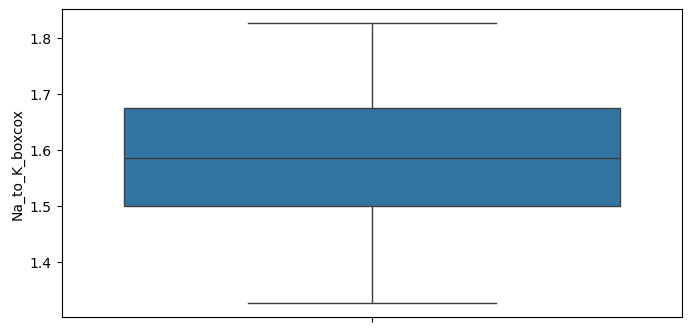

In [ ]:
# Boxplot untuk Na_to_K_boxcox
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Na_to_K_boxcox'])

In [ ]:
#Melihat nilai unik
columns = ['Sex', 'BP', 'Cholesterol', 'Drug']  # Kolom yang ingin dilihat
for column in columns:
    print(f"Nilai unik untuk kolom {column}: {df[column].unique()}")

Nilai unik untuk kolom Sex: ['F' 'M']
Nilai unik untuk kolom BP: ['HIGH' 'LOW' 'NORMAL']
Nilai unik untuk kolom Cholesterol: ['HIGH' 'NORMAL']
Nilai unik untuk kolom Drug: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
# Pastikan kolom memiliki tipe string sebelum digabung
df['Sex_&_BP'] = df['Sex'].astype(str) + "_" + df['BP'].astype(str)

# Menampilkan data baru dengan kolom 'Sex_&_BP'
print(df[['Sex', 'BP', 'Sex_&_BP']].head())


  Sex      BP  Sex_&_BP
0   F    HIGH    F_HIGH
1   M     LOW     M_LOW
2   M     LOW     M_LOW
3   F  NORMAL  F_NORMAL
4   F     LOW     F_LOW


In [ ]:
columns = ['Sex_&_BP']
for column in columns:
    print(f"Nilai unik untuk kolom {column}: {df[column].unique()}")
df

Nilai unik untuk kolom Sex_&_BP: ['F_HIGH' 'M_LOW' 'F_NORMAL' 'F_LOW' 'M_NORMAL' 'M_HIGH']


,Age,Sex,BP,Cholesterol,Drug,Na_to_K_boxcox,Sex_&_BP
0,23,F,HIGH,HIGH,drugY,1.739458,F_HIGH
1,47,M,LOW,HIGH,drugC,1.567367,M_LOW
2,47,M,LOW,HIGH,drugC,1.488721,M_LOW
3,28,F,NORMAL,HIGH,drugX,1.402930,F_NORMAL
4,61,F,LOW,HIGH,drugY,1.656006,F_LOW
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,drugC,1.530432,F_LOW
196,16,M,LOW,HIGH,drugC,1.541693,M_LOW
197,52,M,NORMAL,HIGH,drugX,1.481719,M_NORMAL
198,23,M,NORMAL,NORMAL,drugX,1.587112,M_NORMAL


### Pre Processing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah data type categorical menjadi numerical
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])
df['Sex_&_BP'] = label_encoder.fit_transform(df['Sex_&_BP'])

# Menampilkan data yang telah di-encode
print(df.head())


   Age  Sex  BP  Cholesterol  Drug  Na_to_K_boxcox  Sex_&_BP
0   23    0   0            0     4        1.739458         0
1   47    1   1            0     2        1.567367         4
2   47    1   1            0     2        1.488721         4
3   28    0   2            0     3        1.402930         2
4   61    0   1            0     4        1.656006         1


In [ ]:
print(df.isnull().sum())  # Jumlah missing values per kolom

df.fillna(df.mean(), inplace=True) # Penanganan missing value dengan cara mengganti dengan nilai mean

Age               0
Sex               0
BP                0
Cholesterol       0
Drug              0
Na_to_K_boxcox    0
Sex_&_BP          0
dtype: int64


In [ ]:
#Teknik normalisasi
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_cols = ['Age', 'Na_to_K_boxcox'] #Kolom yang akan di scalling

scaler = MinMaxScaler() # Inisialisasi scaler

# Terapkan scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())  # Cek hasil scaling
df

        Age  Sex  BP  Cholesterol  Drug  Na_to_K_boxcox  Sex_&_BP
0  0.135593    0   0            0     4        0.825589         0
1  0.542373    1   1            0     2        0.481933         4
2  0.542373    1   1            0     2        0.324881         4
3  0.220339    0   2            0     3        0.153560         2
4  0.779661    0   1            0     4        0.658940         1


,Age,Sex,BP,Cholesterol,Drug,Na_to_K_boxcox,Sex_&_BP
0,0.135593,0,0,0,4,0.825589,0
1,0.542373,1,1,0,2,0.481933,4
2,0.542373,1,1,0,2,0.324881,4
3,0.220339,0,2,0,3,0.153560,2
4,0.779661,0,1,0,4,0.658940,1
...,...,...,...,...,...,...,...
195,0.694915,0,1,0,2,0.408176,1
196,0.016949,1,1,0,2,0.430663,4
197,0.627119,1,2,0,3,0.310898,5
198,0.135593,1,2,1,3,0.521362,5


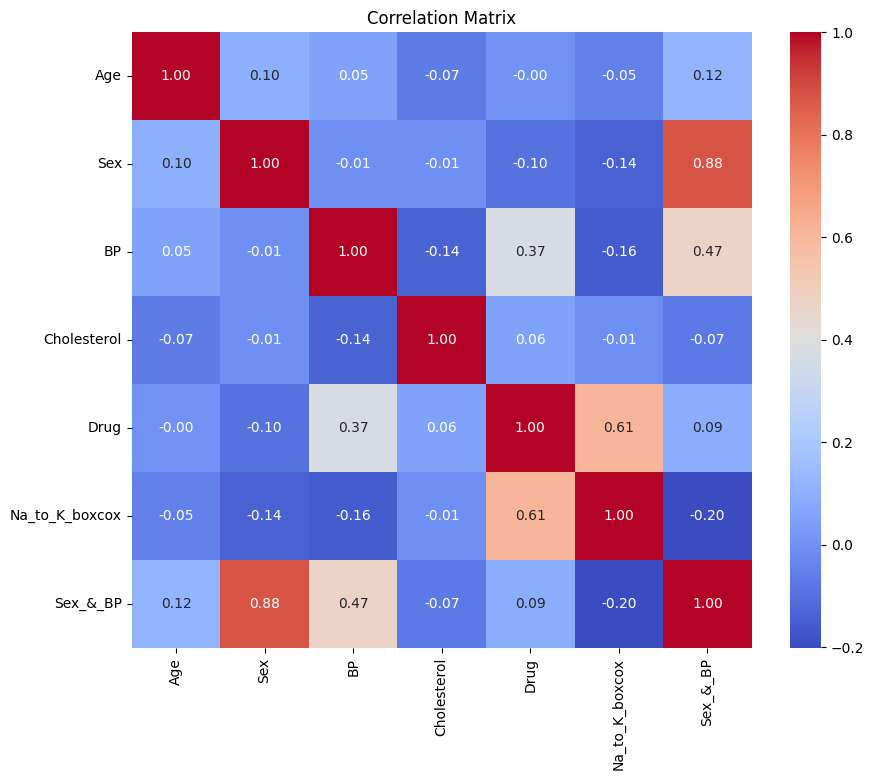

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Memvisualisasikan matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
# Pilih fitur numerik dan target
# Pastikan hanya menggunakan nama kolom dalam daftar
X = df[['Age', 'Na_to_K_boxcox', 'Cholesterol', 'Sex_&_BP']]  # Kolom yang valid
y = df['Drug']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

# Simpan hasil evaluasi untuk setiap test size
results = []

# Loop untuk test size dari 0.3 hingga 0.6 dengan langkah 0.1
for test_size in np.arange(0.3, 0.7, 0.1):
    # Membagi data menjadi train-test dengan test_size yang berbeda
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Terapkan SMOTE pada data pelatihan
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Latih model Decision Tree (C4.5)
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_resampled, y_resampled)

    # Prediksi pada data uji
    y_pred = clf.predict(X_test)

    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Simpan precision, recall, F1-score, dan support
    report = classification_report(y_test, y_pred, digits=4, output_dict=True)

    # Simpan hasil
    results.append({'test_size': test_size, 'accuracy': accuracy, 'classification_report': report})

# Tampilkan hasil
for result in results:
    print(f"\n=== Test Size: {result['test_size']:.1f} ===")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("\nClassification Report:")
    print(f"{'Class':<8}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}")
    print("=" * 48)
    for label, metrics in result['classification_report'].items():
        if isinstance(metrics, dict):  # Hanya tampilkan metrik per kelas
            print(f"{label:<8}{metrics['precision']:<10.4f}{metrics['recall']:<10.4f}{metrics['f1-score']:<10.4f}{metrics['support']:<10.0f}")



=== Test Size: 0.3 ===
Accuracy: 0.9333

Classification Report:
Class   Precision Recall    F1-Score  Support   
0       0.7500    0.8571    0.8000    7         
1       1.0000    0.6000    0.7500    5         
2       0.7143    1.0000    0.8333    5         
3       1.0000    0.9375    0.9677    16        
4       1.0000    1.0000    1.0000    27        
macro avg0.8929    0.8789    0.8702    60        
weighted avg0.9470    0.9333    0.9333    60        

=== Test Size: 0.4 ===
Accuracy: 0.8750

Classification Report:
Class   Precision Recall    F1-Score  Support   
0       0.8182    1.0000    0.9000    9         
1       1.0000    0.1429    0.2500    7         
2       0.6667    1.0000    0.8000    6         
3       0.7917    0.8636    0.8261    22        
4       1.0000    0.9722    0.9859    36        
macro avg0.8553    0.7957    0.7524    80        
weighted avg0.8973    0.8750    0.8540    80        

=== Test Size: 0.5 ===
Accuracy: 0.8600

Classification Report:
Class   Pre

### Modelling Data

Distribusi Kelas Sebelum SMOTE:
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

Distribusi Kelas Setelah SMOTE:
Drug
2    64
0    64
4    64
1    64
3    64
Name: count, dtype: int64

Contoh Data Sebelum SMOTE:
          Age  Na_to_K_boxcox  Cholesterol  Sex_&_BP
158  0.745763        0.345125            0         1
46   0.372881        0.481844            0         0
130  0.932203        0.723694            0         2
31   1.000000        0.289348            0         3
85   0.745763        0.517894            0         3

Contoh Data Setelah SMOTE:
        Age  Na_to_K_boxcox  Cholesterol  Sex_&_BP  Drug
0  0.745763        0.345125            0         1     2
1  0.372881        0.481844            0         0     0
2  0.932203        0.723694            0         2     4
3  1.000000        0.289348            0         3     1
4  0.745763        0.517894            0         3     1


<ipython-input-28-32d76598324b>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(y_encoded), palette='viridis')
<ipython-input-28-32d76598324b>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_resampled['Drug'], palette='viridis')


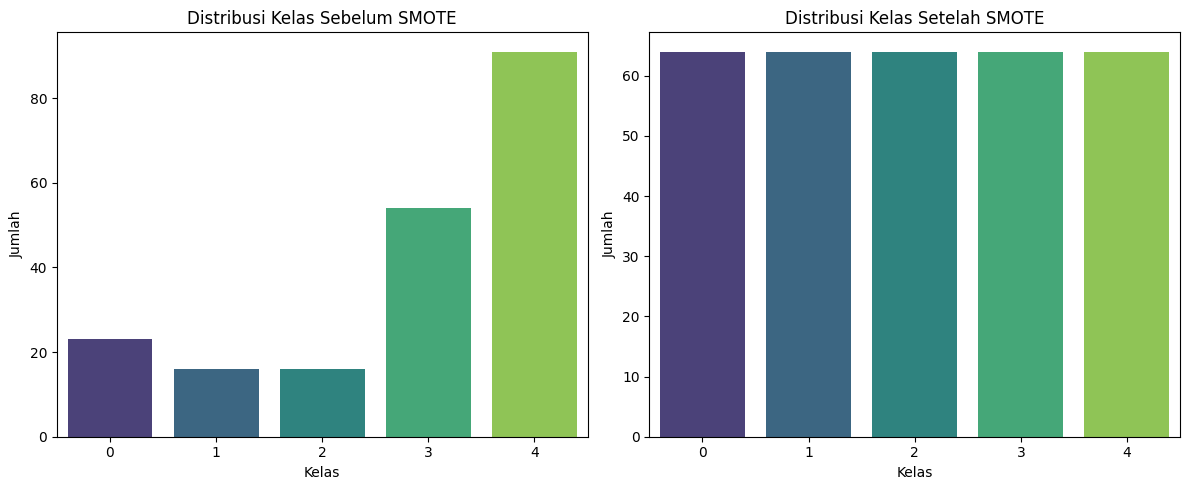

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode kolom target menjadi numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode target menjadi numerik

# Cek distribusi kelas sebelum augmentasi
print("Distribusi Kelas Sebelum SMOTE:")
print(pd.Series(y_encoded).value_counts())  # Cek distribusi kelas setelah encoding

# Membagi data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Konversi hasil augmentasi ke DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)

# Tambahkan kolom target hasil SMOTE
data_resampled['Drug'] = y_resampled

# Decode target kembali ke label asli
data_resampled['Drug'] = label_encoder.inverse_transform(data_resampled['Drug'])

# Cek distribusi kelas setelah augmentasi
print("\nDistribusi Kelas Setelah SMOTE:")
print(data_resampled['Drug'].value_counts())

# Menampilkan sebagian data sebelum dan sesudah augmentasi
print("\nContoh Data Sebelum SMOTE:")
print(X_train.head())

print("\nContoh Data Setelah SMOTE:")
print(data_resampled.head())

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=pd.Series(y_encoded), palette='viridis')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
sns.countplot(x=data_resampled['Drug'], palette='viridis')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        64
           1     1.0000    1.0000    1.0000        64
           2     1.0000    1.0000    1.0000        64
           3     1.0000    1.0000    1.0000        64
           4     1.0000    1.0000    1.0000        64

    accuracy                         1.0000       320
   macro avg     1.0000    1.0000    1.0000       320
weighted avg     1.0000    1.0000    1.0000       320


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.7500    0.8571    0.8000         7
           1     1.0000    0.6000    0.7500         5
           2     0.7143    1.0000    0.8333         5
           3     1.0000    0.9375    0.9677        16
           4     1.0000    1.0000    1.0000        27

    accuracy                         0.9333        60
   macro avg     0.8929    0.8789    0.8702        60
weighte

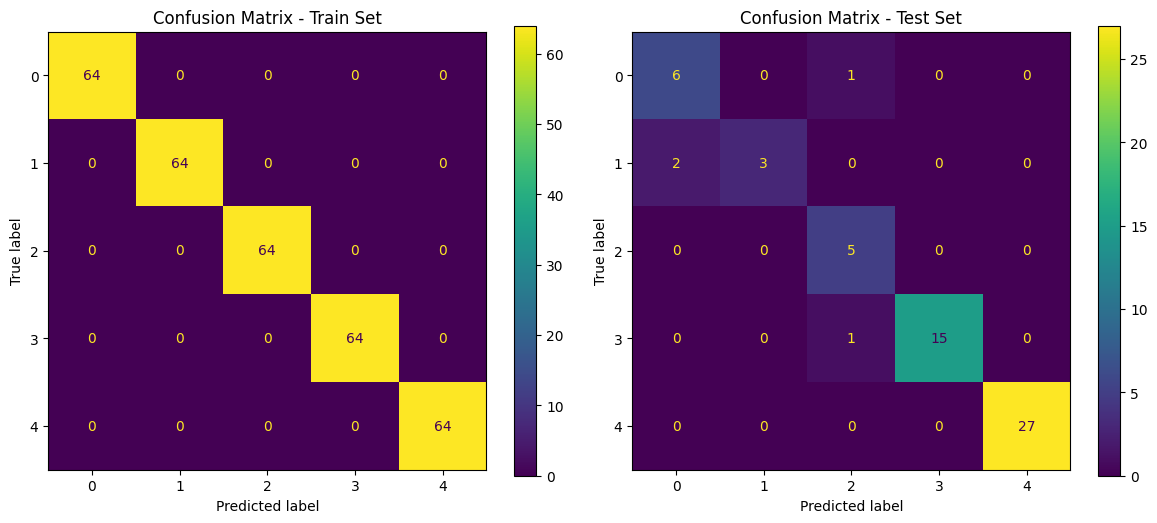

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Latih model menggunakan data hasil augmentasi
clf.fit(X_resampled, y_resampled)

# Evaluasi pada data latih
y_pred_train = clf.predict(X_resampled)
print("Classification Report - Train Set:")
print(classification_report(y_resampled, y_pred_train, digits=4))

# Confusion Matrix untuk data latih
cm_train = confusion_matrix(y_resampled, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.unique(y))

# Evaluasi pada data uji (tanpa augmentasi)
y_pred_test = clf.predict(X_test)
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_test, digits=4))

# Confusion Matrix untuk data uji
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y))

# Visualisasi Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

disp_test.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

# Augmentasi data menggunakan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_params = None
best_score = 0
best_model = None

# Loop untuk mencoba setiap kombinasi hyperparameter
from itertools import product

keys = param_grid.keys()
values = param_grid.values()
combinations = list(product(*values))

for combination in combinations:
    params = dict(zip(keys, combination))

    # Inisialisasi model dengan parameter tertentu
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, **params)

    # Latih model pada data latih yang telah di-resample
    clf.fit(X_resampled, y_resampled)

    # Evaluasi pada data uji
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    # Periksa apakah skor lebih baik dari hasil sebelumnya
    if score > best_score:
        best_score = score
        best_params = params
        best_model = clf

### Hasil dan Evaluasi

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}
Best Accuracy on Test Set: 0.95

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     0.9697    1.0000    0.9846        64
           1     1.0000    0.9844    0.9921        64
           2     0.9688    0.9688    0.9688        64
           3     0.9841    0.9688    0.9764        64
           4     1.0000    1.0000    1.0000        64

    accuracy                         0.9844       320
   macro avg     0.9845    0.9844    0.9844       320
weighted avg     0.9845    0.9844    0.9844       320


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.7778    1.0000    0.8750         7
           1     1.0000    0.6000    0.7500         5
           2     0.8333    1.0000    0.9091         5
           3     1.0000    0.9375    0.9677        16
           4     1.0000    1

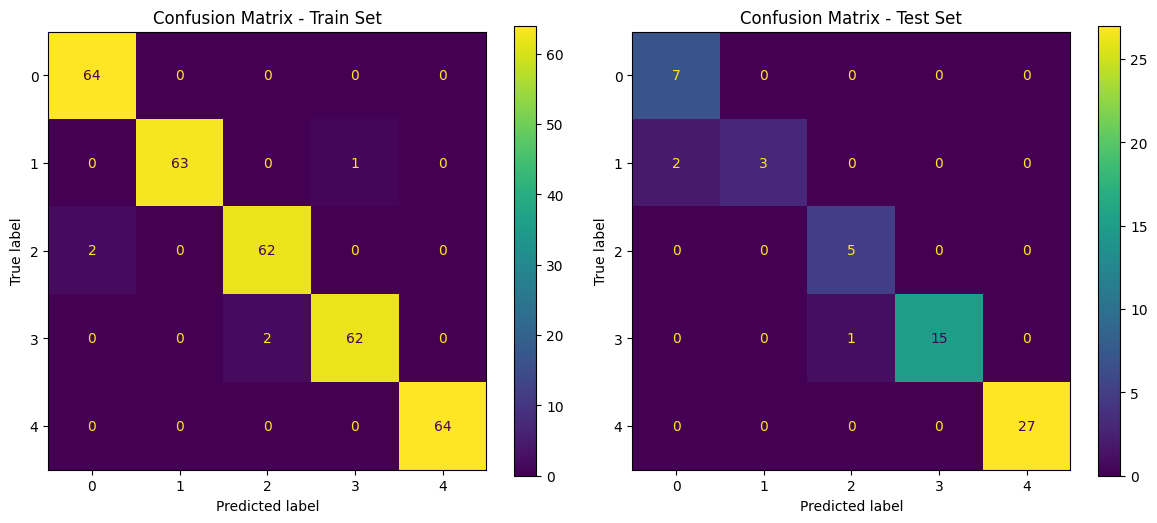

In [ ]:
# Cetak hasil terbaik
print("Best Hyperparameters:", best_params)
print("Best Accuracy on Test Set:", best_score)

# Evaluasi pada data latih (resampled)
y_pred_train = best_model.predict(X_resampled)
print("\nClassification Report - Train Set:")
print(classification_report(y_resampled, y_pred_train, digits=4))

# Confusion Matrix untuk data latih
cm_train = confusion_matrix(y_resampled, y_pred_train)

# Evaluasi pada data uji (tanpa augmentasi)
y_pred_test = best_model.predict(X_test)
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_test, digits=4))

# Confusion Matrix untuk data uji
cm_test = confusion_matrix(y_test, y_pred_test)

# Visualisasi Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.unique(y))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y))
disp_test.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Cross-validation pada model terbaik
# Inisialisasi StratifiedKFold untuk cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lakukan cross-validation pada data awal (sebelum augmentasi)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')

# Tampilkan hasil cross-validation
print("\nCross-Validation Results:")
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {np.mean(cv_scores):.4f}')
print(f'Standard Deviation: {np.std(cv_scores):.4f}')


Cross-Validation Results:
Cross-Validation Scores: [0.925 0.85  0.975 0.925 0.875]
Mean Accuracy: 0.9100
Standard Deviation: 0.0436


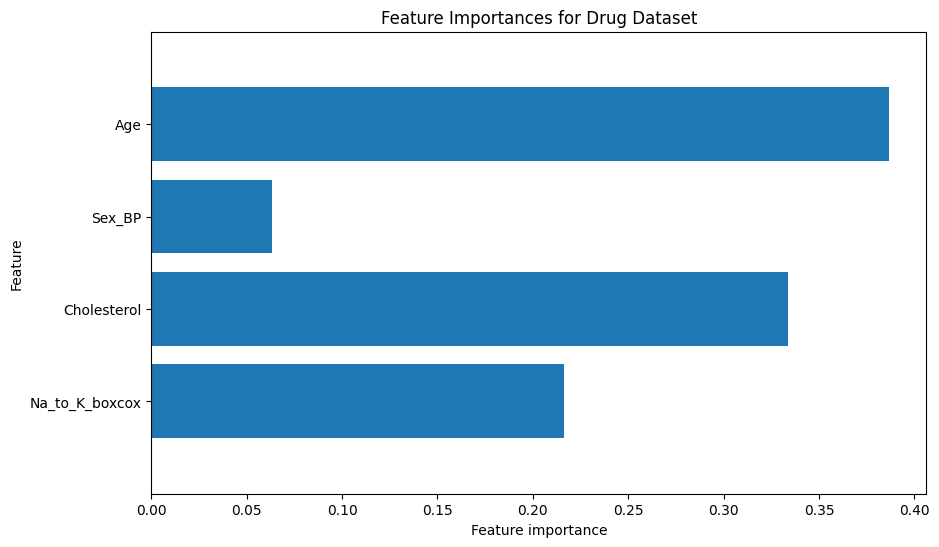

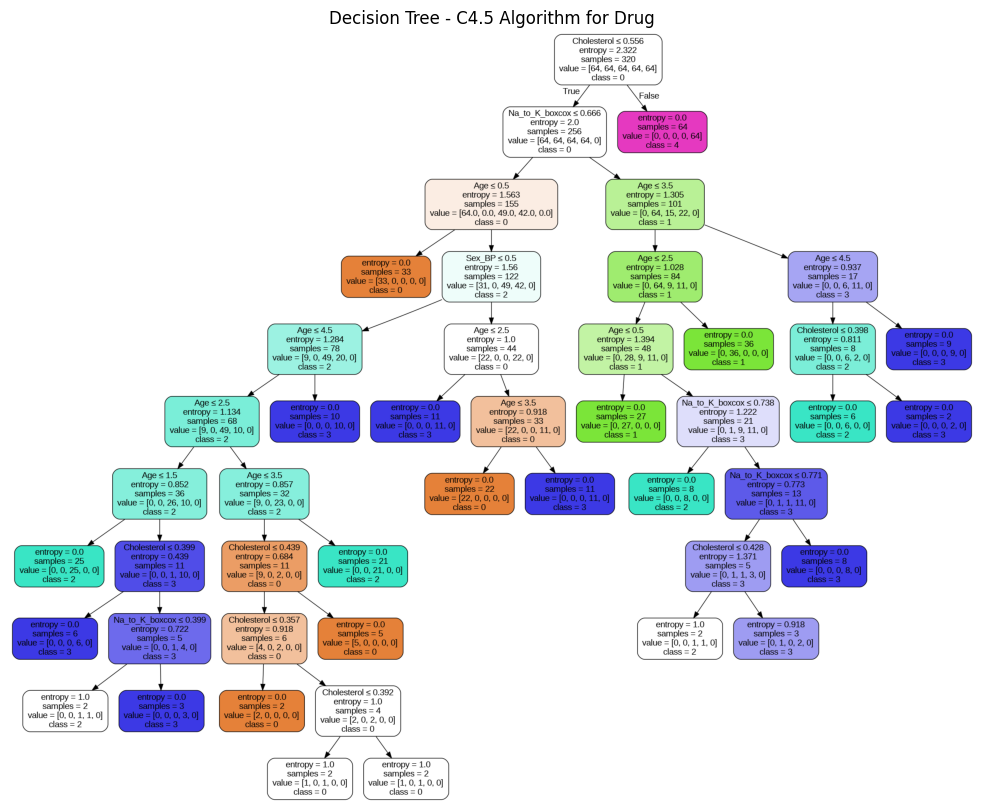

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder

# Pastikan untuk menggunakan model terbaik hasil GridSearch
best_model = best_model  # Hasil terbaik dari GridSearch

# Fitur yang digunakan dalam model
feature_names = ['Na_to_K_boxcox', 'Cholesterol', 'Sex_BP', 'Age']  # Perbaiki sesuai fitur input

# Tentukan nama kelas (class_names)
class_names = [str(cls) for cls in label_encoder.classes_]  # Ubah semua nama kelas menjadi string

# Fungsi untuk menampilkan pentingnya fitur
def plot_feature_importances_drugData(model, feature_names):
    # Pastikan model telah dilatih
    if not hasattr(model, 'feature_importances_'):
        raise ValueError("Model belum dilatih. Pastikan untuk memanggil metode .fit() sebelum menampilkan pentingnya fitur.")

    # Pastikan jumlah fitur sesuai dengan model
    n_features = len(model.feature_importances_)  # Ambil jumlah fitur dari model
    if len(feature_names) != n_features:
        print(f"Warning: Number of features in feature_names ({len(feature_names)}) "
              f"does not match the number of features in the model ({n_features}). Adjusting...")
        feature_names = feature_names[:n_features]  # Potong jika kelebihan fitur

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature Importances for Drug Dataset")
    plt.show()

# Pastikan model terbaik dari GridSearch digunakan
plot_feature_importances_drugData(best_model, feature_names)

# Ekspor pohon keputusan ke Graphviz
dot_data = export_graphviz(
    best_model,
    feature_names=feature_names[:len(best_model.feature_importances_)],  # Pastikan fitur sesuai dengan model
    class_names=class_names,  # Nama kelas target, sudah diubah menjadi string
    filled=True,
    rounded=True,
    special_characters=True  # Tetap gunakan untuk simbol HTML
)

# Render grafik pohon keputusan
graph = graphviz.Source(dot_data)
graph.render('decision_tree_drug', format='png')

# Tampilkan grafik pohon keputusan
graph_image = plt.imread('decision_tree_drug.png')
plt.figure(figsize=(20, 10))
plt.imshow(graph_image)
plt.axis('off')
plt.title('Decision Tree - C4.5 Algorithm for Drug')
plt.show()


### Conclusion
Penelitian ini bertujuan untuk mengembangkan model klasifikasi yang dapat membantu menentukan obat yang paling sesuai untuk pasien berdasarkan karakteristik demografis dan medis mereka. Dataset yang digunakan mencakup informasi seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, serta respons pasien terhadap lima jenis obat yang berbeda.

Dengan menggunakan algoritma pohon keputusan C4.5, penelitian ini berhasil menghasilkan model yang mampu memprediksi obat yang paling efektif untuk pasien baru. Hasil penelitian menunjukkan bahwa model ini mencapai akurasi sebesar 95% pada data pengujian. Akurasi ini menunjukkan potensi besar dalam mendukung pengambilan keputusan klinis, sehingga dapat meningkatkan efektivitas pengobatan dan memberikan rekomendasi yang lebih akurat berdasarkan profil individu pasien.

Penelitian ini memberikan kontribusi penting dalam memahami hubungan antara karakteristik pasien dan respons terhadap obat, serta membuka peluang untuk pengembangan model prediktif lebih lanjut yang dapat diterapkan dalam dunia medis. Model ini diharapkan dapat membantu dokter dalam meresepkan obat yang lebih tepat, sehingga memperbaiki kualitas perawatan pasien.


In [ ]:
!jupyter nbconvert --to html "./UAS2024_IF540L_KelasAL_Kelompok_4.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#